In [1]:
GPT2_VERSION = 'gpt2-large'
FILTER = 'unfiltered'


In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winobias_data/attention_intervention_results_{GPT2_VERSION}_{FILTER}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 160
Mean total effect: 0.427

INDIRECT Effect (mean = 0.000503724838706969)
Top 10 heads:
   16 19: 0.034 (p=0.0000)
   16 5: 0.034 (p=0.0000)
   15 6: 0.030 (p=0.0000)
   12 14: 0.028 (p=0.0000)
   8 5: 0.028 (p=0.0000)
   10 7: 0.025 (p=0.0000)
   18 5: 0.021 (p=0.0000)
   11 1: 0.019 (p=0.0000)
   17 5: 0.016 (p=0.0000)
   19 3: 0.012 (p=0.0000)

DIRECT Effect (mean = 0.4260276781542356)
Top 10 heads:
   16 19: 0.383 (p=0.2552)
   15 6: 0.386 (p=0.2707)
   12 14: 0.387 (p=0.2776)
   16 5: 0.387 (p=0.2784)
   10 7: 0.390 (p=0.2907)
   18 5: 0.393 (p=0.3100)
   17 5: 0.399 (p=0.3433)
   11 1: 0.400 (p=0.3479)
   16 16: 0.403 (p=0.3616)
   19 3: 0.405 (p=0.3764)


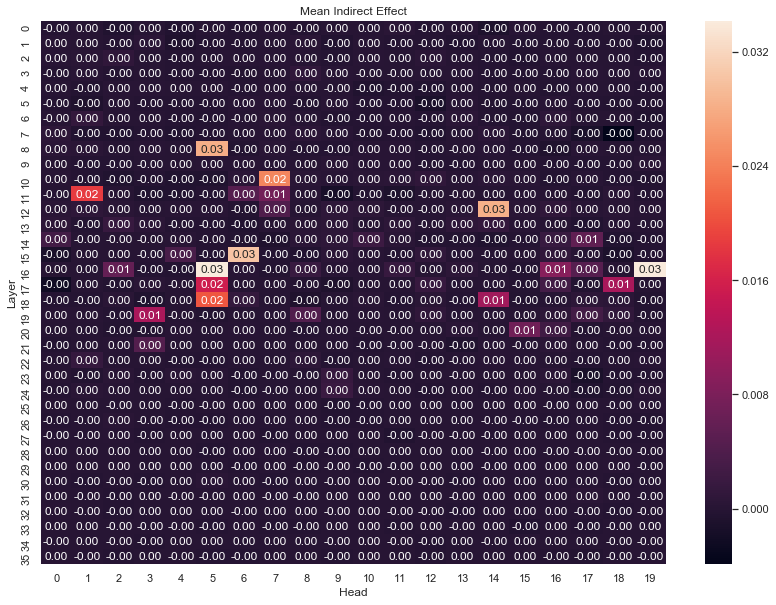

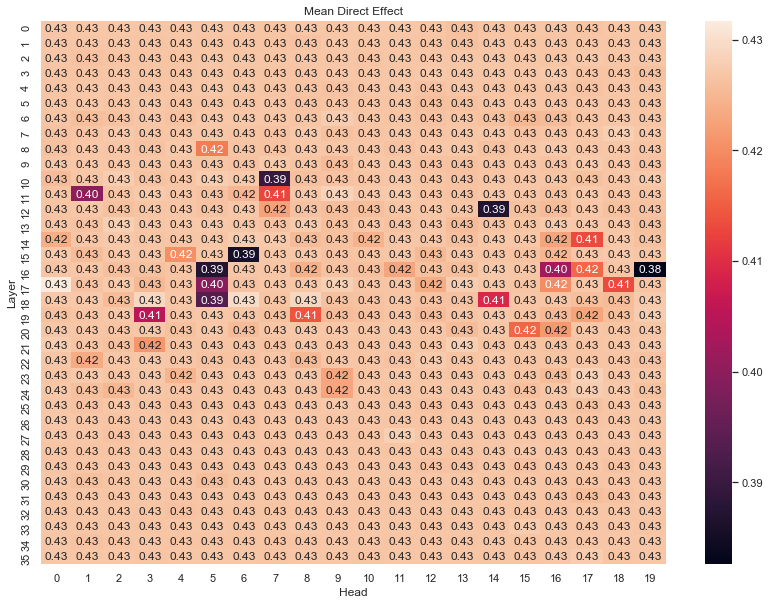

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 160
Mean total effect: 0.427


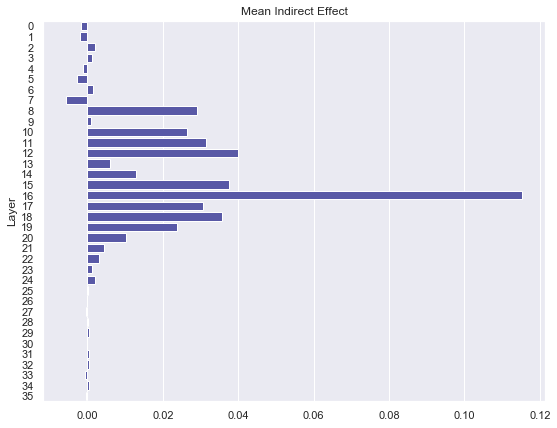

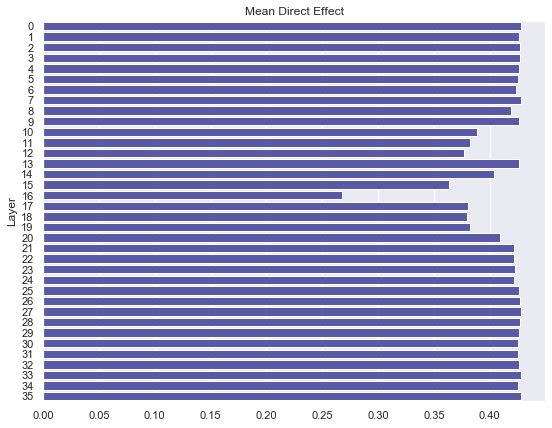

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The mover said thank you to the housekeeper because she
x': The mover said thank you to the housekeeper because he
c1: cleaned the truck .
c2: is grateful .

p(c2|x) / p(c1|x) = 0.26166
p(c2|x') / p(c1|x') = 1.08026

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 3.128


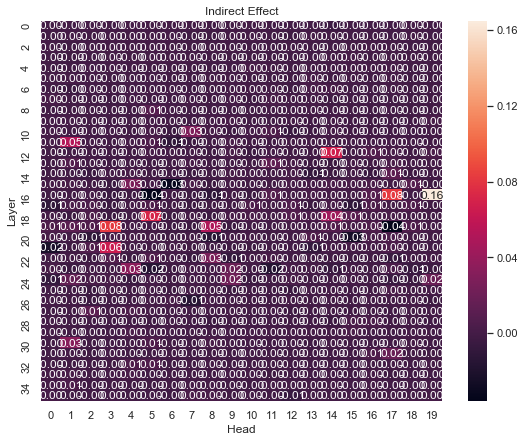

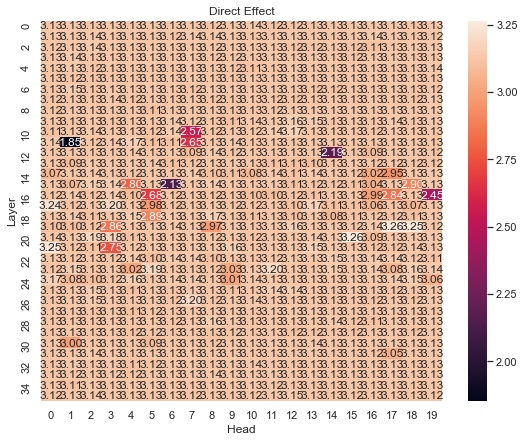

In [6]:
report_intervention(results[0])

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.10183
p(c2|x') / p(c1|x') = 0.13033

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.280


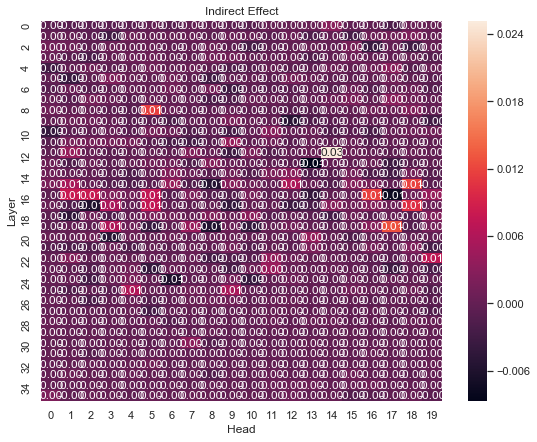

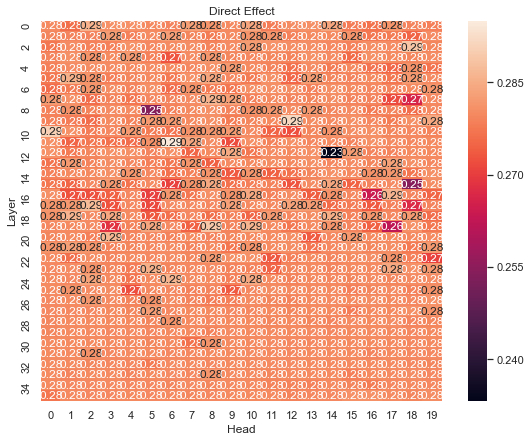

In [7]:
report_intervention(results[1])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.46155
p(c2|x') / p(c1|x') = 1.33202

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 1.886


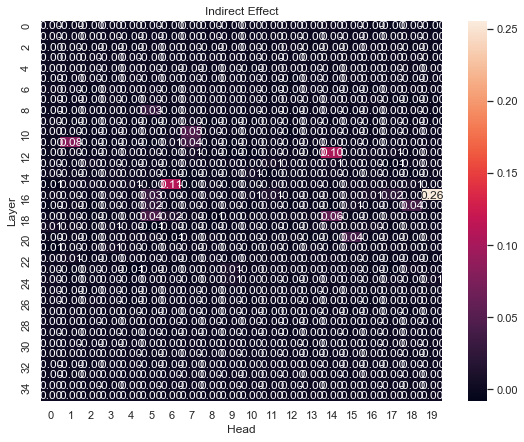

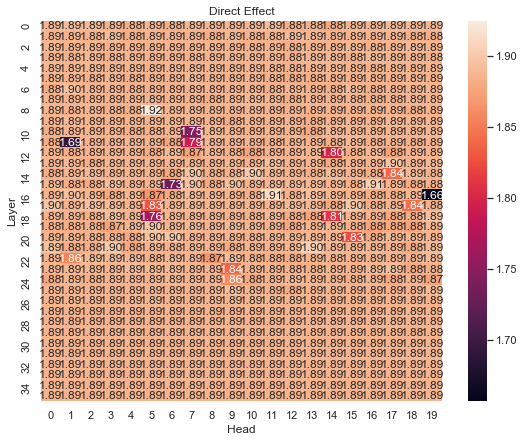

In [8]:
report_intervention(results[2])

x : The lawyer yelled at the hairdresser because she
x': The lawyer yelled at the hairdresser because he
c1: did a bad job .
c2: was mad .

p(c2|x) / p(c1|x) = 0.30771
p(c2|x') / p(c1|x') = 0.33516

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.089


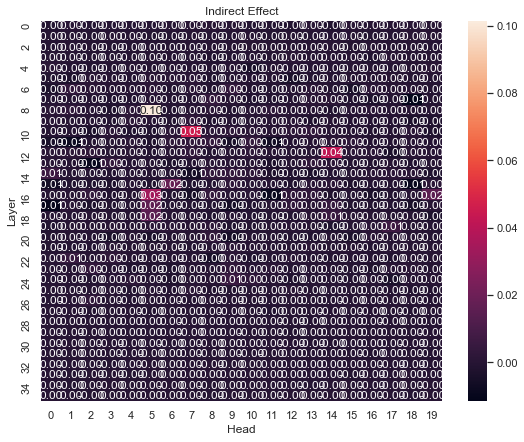

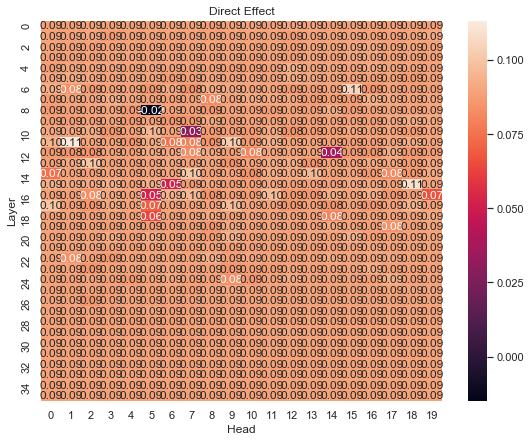

In [9]:
report_intervention(results[3])
